# Chicken Farm


#### Hi welcome to the Chicken Farm lesson.
#### In this lesson you will use `Linear Regression` algorithm and your agent to build a chicken farm!


<img src="resources/ChickenFarm.png" width=1000px>


#### Background:

There is a village that needs to build a chicken farm. There are now 87 chickens in the village, but no one knows how big the farm should be. You are the builder of this chicken farm, and you need to use your robot to build a proper chicken farm for the village. The farm should not be too large (villagers do not want to waste money) or too small (because it will affect the growth of the chickens). Therefore, you need to find a proper size by your self. Here are some data from other chicken farms, please use this data to predict the size of this farm and help the villagers to build it.

##### Farm size: [20,40,60,80,100,120,140,40,50,60,105,48,54,63,72,103,108,93,90,68,36,90,88]

##### N of Chickens: [15,28,50,68,75,93,130,35,38,78,81,33,40,45,75,70,100,95,60,70,70,110,52]


#### If you never learn statistics or machine learning before, you might be wondering How ???
#### Let's see an example first

## Data Visualization

If you want to extract some useful information from a set of data, the most common way to do this is to make a graph. Graph makes the data more natural for us to understand and help us identify trends and patterns easily.

Now Let's learn How to use Python to print and analyze data.

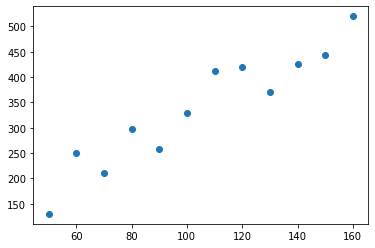

In [5]:
import matplotlib.pyplot as plt

#Let's assume that we have some price and size of houses in a city

size = [50,60,70,80,90,100,110,120,130,140,150,160] 
# size in square meter

price= [130,250,210,298,258,330,412,420,370,425,443,520] 
# price in hundred thousands

# We can use a python library called matplotlib to visualize our data 
plt.plot(size,price, "o")

plt.show()

# when we print our data, we can easily find that our data shows a linear trend
# We learned in math that the equation of a straight line is y= mx+b, so let's find a line that can fit our data.

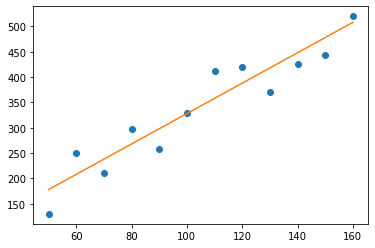

In [6]:
m= 3
# m is the slope of the line

b=28
# b is the intercept of the line

y=[m*x+b for x in size]
# the equation of the line 

plt.plot(size,price,"o")

plt.plot(size,y)

plt.show()

### Now we can try to print our chicken farm data

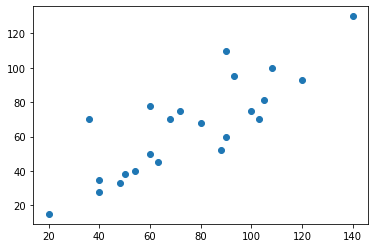

In [7]:
#Let's assume that we have some price and size of houses in a city

size=[20,40,60,80,100,120,140,40,50,60,105,48,54,63,72,103,108,93,90,68,36,90,88]
# farm size

Num_Chickens= [15,28,50,68,75,93,130,35,38,78,81,33,40,45,75,70,100,95,60,70,70,110,52]
# number of chickens

# We can use a python library called matplotlib to visualize our data 
plt.plot(size,Num_Chickens, "o")

plt.show()



From the graph, we can see that our data also shows a linear trend. But how can we find a line that best fit this dataset, how can we find M and B?

### Classification and Regression

Let's learn some background before we start to build our linear regression model.


##### Machine Learning and Linear regression:
Machine learning algorithms build a model based on sample data, in order to make predictions or decisions without being explicitly programmed to do so (Wikipedia). We can distinguish ML algorithms to two types by their output, classification and Regression (more detials see below). Linear regression is one of the regression Machine Learning algorithm. We can use it to find the line that best fits the data. 


##### What is Classification:
Classification is the process of finding or discovering a model or function which helps in separating the data into multiple categorical classes(GeeksforGeeks). For example, classify if an email is spam or not. (the output is discrete value)


##### What is Regression:
Regression is the process of finding a model or function for distinguishing the data into continuous real values instead of using classes or discrete values(GeeksforGeeks). For example, we have a dataset that contains some data pairs on the price of a house vs. the size of a house. Then we can train the model and predict the price of a new house based on the given size. (the output is continuous)




### Squared Distance(Loss)

Now we know what is linear regression, but how should we perform the algorithm? Let's learn what is Squared Distance(Loss) first.

In math, the equation of a straight line is Y=mx + b (X and Y are the value on the axis, m= slope or gradient and b is intercept or the value of y when x=0). So, we should find the best m value and b value for our data, but what is the best and how to find the value?

<img src="resources/SD.jpg" width=500px>

In this graph, the `red dots` represent our data. 

The `blue line` is the prediction line. 

The `purple points` represent the corresponding Y value.

The `green line` shows the distance between our data and the prediction line.

We use loss to determine whether a model is good or bad. In our graph the loss is the squared distance between red dots and the blue line. And our goal is to find the best m and b value for the prediction line that minimizes our loss.



### Ordinary Least Squares

We call the process of finding the minimum loss value as optimization, in this lesson we will learn how to implement an optimization algorithm called Ordinary Least Squares (OLS):

To minimizes the loss, we need to minimize the mean squared error (MSE) of our model.

`Formula for mean squared error: MSE= 1/n Σ square(y - y’)`

N= number of elements in our dataset

Y= The Y-intercept value corresponding to the given x value in the data (red dots in the previous graph)

Y’= The Y-intercept value corresponding to the given x value on our prediction line. (purple dots in the previous graph)

Through some math we get the following formula to help us to find M and B

M=( Mean(ΣXY) - (Mean(ΣX)*Mean(ΣY)) ) / (Mean(Σsquare(X)) - (square(Mean(ΣX))))

B= Mean(ΣY) – M (Mean(ΣX))

We’re not going to get into the math behind the formula in this lesson, but if you’re interested check out this article: https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/


### OLS python implimentation:

Now let's learn how to impliment OLS by python 

In [8]:
import numpy as np

def calculate_MB(x,y):
    
    x=np.array(x)
    #convert list to numpy array
    y=np.array(y)
    

    Mean_x=np.mean(x)
    #Mean(ΣX)
    
    Mean_y=np.mean(y)
    #Mean(ΣY)
    
    Mean_xy=np.mean(x*y)
    #Mean(ΣXY)
    
    x_sqr=[point**2 for point in x]
    #Sqr(X)
    
    Mean_x_sqr=np.mean(x_sqr)
    #Mean(Sqr(ΣX))
    
    M=(Mean_xy-(Mean_x*Mean_y))/(Mean_x_sqr-(Mean_x**2))
    
    B=Mean_y-(M*Mean_x)
    
    return M,B

Now Let's test our OLS function, we can reuse the data above. In the house price example, we calculate the M and B value by Excel and get M=3 and B=28

In [11]:
size = [50,60,70,80,90,100,110,120,130,140,150,160] 

price= [130,250,210,298,258,330,412,420,370,425,443,520]

M,B=calculate_MB(size,price)
print("M="+str(M))
print("B="+str(B))

# we get the same output as above

M=2.9580419580419597
B=28.238927738927543


We have the slope and intercept now, let's predict a point by our model

In [16]:
def Linear_regression(x,y,predict):

    M,B=calculate_MB(x,y)

    Y=[M*X+B for X in x]

    # the equation of the line
    
    pre=M*predict+B
    
    print("prediction: "+str(pre))
    #print the prediction of your point
    plt.plot(x,y,"o")

    plt.plot(x,Y)

    plt.show()

prediction: 229.3857808857808


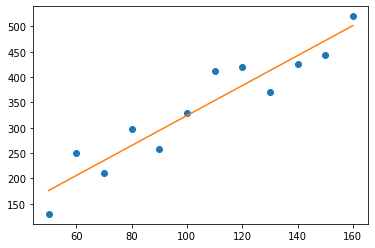

In [19]:
Linear_regression(size,price,68)

#based on our model, if we have a house with size 68 then, the price could be 229.4 

Yeah! We implemented a linear regression model!!

However, it would be a lot of works if we had to implement the algorithm every time when we want to use linear regression. Fortunately, Python’s Scikit-learn library provides us with linear regression models that we can use whenever we need.

### Scikit-learn Linear regression implementation

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

#we still use the house price example above

size = [50,60,70,80,90,100,110,120,130,140,150,160] 

price= [130,250,210,298,258,330,412,420,370,425,443,520]

#you can call LinearRegression model in sklearn library
ourmodel=LinearRegression()

'''
Here we will call ourmodel.fit() function to fit our data 
.fit() will take two parameters (X(2D array),y(1D array))
so we have to reshape our size to:

[[ 50]
 [ 60]
 [ 70]
 [ 80]
 [ 90]
 [100]
 [110]
 [120]
 [130]
 [140]
 [150]
 [160]]
 
'''
npsize=np.array(size)
#here we convert our list to numpy array

npsize=npsize.reshape(-1,1)
#and we use numpy.reshape function to conver list to a 2D array

print("new array: ",'\n',npsize)
#let's print our array

#now we are good to fit our model
ourmodel.fit(npsize,price)

#after we fit the data we can call ourmodel.coef_ to check the slope and ourmodel.intercept_ to check intercept
print("-------------------------")
print("slope: "+str(ourmodel.coef_))
print("intercept: "+str(ourmodel.intercept_))


#we can use .predict() function to predict the Y value by input x value
print("predict:",ourmodel.predict([[68]]))# note here input x should be a 2D array

# the output from sklearn library is same as our OLS model


new array:  
 [[ 50]
 [ 60]
 [ 70]
 [ 80]
 [ 90]
 [100]
 [110]
 [120]
 [130]
 [140]
 [150]
 [160]]
-------------------------
slope: [2.95804196]
intercept: 28.238927738927828
predict: [229.38578089]


Also we can print our prediction line

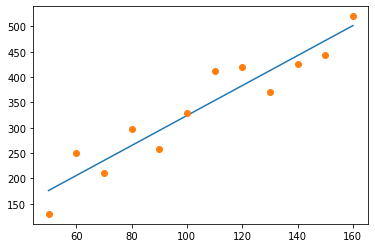

In [25]:
plt.plot(npsize,ourmodel.predict(npsize))
plt.plot(npsize,price,'o')
plt.show()

### Now it's your turn

you can choose either way to implement the algorithm and solve the chicken farm problem (don't just copy paset the code from above)

## Let's programming your agent 

Now you have the proper size of the farm, let's learn how to program your agent to build the farm.

In [ ]:
agent.give('fence',100,1)
agent.give('fence gate',10,2)
#give agent some fences and fence gates

#agent.say(agent.get_item(2))



    

        
        
def build(x):                  

    for i in range(4):           
        #4 edges
        agent.turn("right")
        
        for z in range(x):     
        #place fence
            agent.move("forward")
            agent.place(1,'back')
    #build a gate         
    agent.turn('left')
    agent.move('forward')
    agent.turn('lefts')
    agent.move('forward')
    agent.turn('left')
    agent.place(2,'forward')

    agent.say("finished")
    


build(4)
